# Backprop

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Load info from another file.

In [3]:
%run hw_framework.ipynb

Wall time: 153 ms
Wall time: 20.6 ms


### Optimizer

In [4]:
def SGD(params, gradients, lr=1e-3):    
    for weights, gradient in zip(params, gradients):
        weights -= lr * gradient

### Data loader

In [5]:
def loader(X, Y, batch_size):    
    n = X.shape[0]

    indices = np.arange(n)
    np.random.shuffle(indices)
    
    for start in range(0, n, batch_size):
        end = min(start + batch_size, n)
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Import data

In [19]:
data = pd.read_csv('train.csv')

In [20]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
print(data.shape)

(42000, 785)


In [22]:
Y = data['label']
X = data.drop('label', 1).to_numpy()
print(Y.shape)
print(X.shape)

(42000,)
(42000, 784)


To one-hot.

In [23]:
from sklearn.preprocessing import LabelBinarizer

Y_oh = LabelBinarizer().fit_transform(Y)

In [91]:
print(Y_oh.shape)

(42000, 10)


Divide the dataset into train и validation.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_oh, test_size=0.05)

In [26]:
print(X_train.shape)
print(X_test.shape)

(39900, 784)
(2100, 784)


### Accuracy

In [27]:
def accuracy_score(y_true, y_pred):
    true = np.argmax(y_true, axis=1)
    pred = np.argmax(y_pred, axis=1)
    return np.count_nonzero(true == pred) / y_true.shape[0]

### Model

In [35]:
model = Sequential(
    Linear(784, 500),
    Dropout(),
    Linear(500, 200),
    LeakyReLU(),
    #BatchNorm(),
    Linear(200, 70),
    LeakyReLU(),
    #BatchNorm(),
    Linear(70, 10),
    SoftMax(),
)

criterion = CrossEntropy()

### Train

In [87]:
epochs = 50
batch_size = 1000
learning_rate = 0.5*1e-2

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


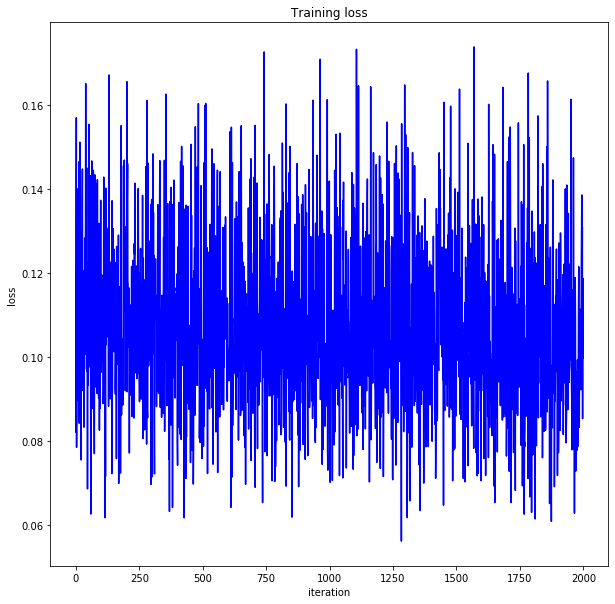

In [88]:
history = []
model.train()

for i in range(epochs):
    print(i)
    for x, y_true in loader(X_train, Y_train, batch_size):
        y_pred = model.forward(x)
        loss = criterion.forward(y_pred, y_true)

        grad = criterion.backward(y_pred, y_true)
        model.backward(x, grad)
        
        SGD(model.parameters(),
            model.grad_parameters(),
            learning_rate)

        history.append(loss)
        
    
plt.figure(figsize=(10, 10))
plt.title("Training loss")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.plot(history, 'b')
plt.show()

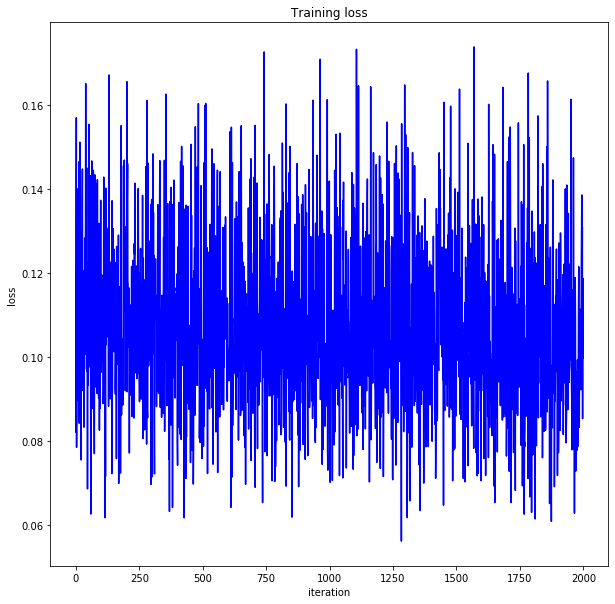

In [89]:
plt.figure(figsize=(10, 10))
plt.title("Training loss")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.plot(history, 'b')
plt.show()

In [92]:
model.eval()

print('epochs = ', epochs)

y_pred_train = model.forward(X_train)
print('accuracy train = ', accuracy_score(Y_train, y_pred_train))

y_pred_test = model.forward(X_test)
print('accuracy test = ', accuracy_score(Y_test, y_pred_test))

epochs =  50
accuracy train =  0.9852130325814537
accuracy test =  0.9747619047619047
